In [30]:
#Importo los paquetes
#los paquetes son numpy, pandas, scipy, math, matplotlib

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt


#Estimators or algoritms 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Model Metrics

#  Regresion Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Clasification Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
#########Construccion del modelo de regresion############

#Crossvalidation
# Anteriormente se usaba sklearn.cross_validation, pero ahora se actualizo a sklearn.model_selection
# Si no se hace el cambio se obtiene un error.

from sklearn.model_selection import train_test_split


In [3]:
#Importo el data set con el EDA listo
rawData = pd.read_csv('credit_ready.csv', header = 0)


In [4]:
#Se observa una variable Unnamed que se debe eliminar.
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
Unnamed: 0    30000 non-null int64
LIMIT_BAL     30000 non-null int64
SEX           30000 non-null int64
EDUCATION     30000 non-null int64
MARRIAGE      30000 non-null int64
AGE           30000 non-null int64
PAY_0         30000 non-null int64
PAY_2         30000 non-null int64
PAY_3         30000 non-null int64
PAY_4         30000 non-null int64
PAY_5         30000 non-null int64
PAY_6         30000 non-null int64
PAY_AMT1      30000 non-null int64
PAY_AMT2      30000 non-null int64
PAY_AMT3      30000 non-null int64
PAY_AMT4      30000 non-null int64
PAY_AMT5      30000 non-null int64
PAY_AMT6      30000 non-null int64
DEFAULT       30000 non-null int64
dtypes: int64(19)
memory usage: 4.3 MB


In [6]:
rawData.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,0,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0


In [5]:
#Elimino la variable Unnamed
rawData1 = rawData.drop(['Unnamed: 0'], axis = 1)

In [6]:
rawData1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0


In [9]:
#Selecting Data- Select the features

features = rawData1.iloc[:, 11:16] 
print('Summary of feature sample')
features.head()


Summary of feature sample


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,0,689,0,0,0
1,0,1000,1000,1000,0
2,1518,1500,1000,1000,1000
3,2000,2019,1200,1100,1069
4,2000,36681,10000,9000,689


In [61]:
#Selecciono la variable dependiente
depVar = rawData1['PAY_AMT6']

In [13]:
# Defino el training set
# Training Set (Feature Space: X Training)

X_train = (features[: 1000])
X_train.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,0,689,0,0,0
1,0,1000,1000,1000,0
2,1518,1500,1000,1000,1000
3,2000,2019,1200,1100,1069
4,2000,36681,10000,9000,689


In [15]:
# Training set para la variable dependiente
# The number of rows much match the X-training set

Y_train = depVar[:1000]
Y_train_count = len(Y_train.index)
print('The number of observations in the Y training set are:',str(Y_train_count))
Y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [18]:
# Genero el testing set para las variables independientes (X-Variables or Feature space)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:', str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5
29900         0         0         0         0         0
29901         0      6556      3250      1563      1208
29902    168096      6409      7335      4448      4519
29903     10018     13333        99        99    172104
29904      2600      4553      5800      2000      1000


In [62]:
# Genero el testing para la variable dependiente, Ground Truth (y_test)
Y_test = depVar[-100:]
Y_test_count = len(Y_test.index)
print('The number of observations in the Y training set are:', str(Y_test_count))
Y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [20]:
#Cross Validation

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train)
X_train.shape, X_test.shape

((750, 5), (250, 5))

In [21]:
#Nombro los modelos
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [23]:
#Reviso la variable dependiente
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [28]:
#Random Forest
modelRF.fit(X_train, Y_train)
print(cross_val_score(modelRF, X_train, Y_train)) # Ejecucion del resultado de crossvalidation
modelRF.score(X_train, Y_train) # Ejecto un Rsquared para obtener un indicador

[-0.00785264  0.18471388 -0.85885951  0.00308693 -0.04326465]


0.8682237169219794

In [29]:
#Support Vector Regression
modelSVR.fit(X_train, Y_train)
print(cross_val_score(modelSVR, X_train, Y_train)) # Ejecucion del resultado de crossvalidation
modelSVR.score(X_train, Y_train) # Ejecto un Rsquared para obtener un indicador

[-0.02140337 -0.04531528 -0.07082222 -0.01580504 -0.06520657]


-0.0234552399434802

In [30]:
#Linear Regression
modelLR.fit(X_train, Y_train)
print(cross_val_score(modelLR, X_train, Y_train)) # Ejecucion del resultado de crossvalidation
modelLR.score(X_train, Y_train) # Ejecto un Rsquared para obtener un indicador

[-0.11796871  0.1610307  -2.24150614 -0.04987599 -0.84096709]


0.2599904988491267

In [31]:
#Genero las predicciones
#Random Forest
predictRF = modelRF.predict(X_test)
rsquared_RF = r2_score(Y_test, predictRF)
rmse_RF = sqrt(mean_squared_error(Y_test, predictRF))
print('R Squared: %.3f' % rsquared_RF)
print('RMSE: %.3f' % rmse_RF)

R Squared: 0.097
RMSE: 13690.780


In [32]:
#SVM 
predictSVR = modelSVR.predict(X_test)
rsquared_SVR = r2_score(Y_test, predictSVR)
rmse_SVR = sqrt(mean_squared_error(Y_test, predictSVR))
print('R Squared: %.3f' % rsquared_SVR)
print('RMSE: %.3f' % rmse_SVR)

R Squared: -0.040
RMSE: 14691.020


In [33]:
#Linear Regression
predictLR = modelLR.predict(X_test)
rsquared_LR = r2_score(Y_test, predictLR)
rmse_LR = sqrt(mean_squared_error(Y_test, predictLR))
print('R Squared: %.3f' % rsquared_LR)
print('RMSE: %.3f' % rmse_LR)

R Squared: 0.082
RMSE: 13807.607


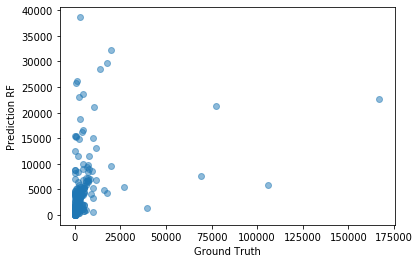

In [47]:
#Graficacion de los resultados
#RF
plt.scatter(Y_test, predictRF, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction RF')
plt.show()

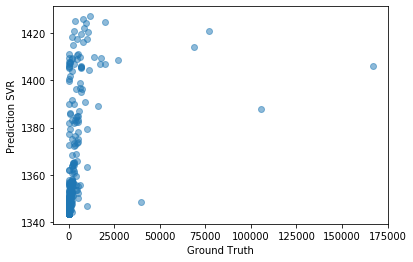

In [48]:
#Graficacion de los resultados
#SVR
plt.scatter(Y_test, predictSVR, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction SVR')
plt.show()

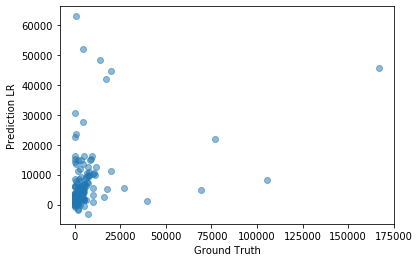

In [49]:
#Graficacion de los resultados
#LR
plt.scatter(Y_test, predictLR, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction LR')
plt.show()

In [7]:
################Construccion del modelo de clasificacion##############
# la variable dependiente y que interesa conocer es DEFAULT

##Revision de dataset, cleaning and preprocesing
rawData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(18)
memory usage: 4.1 MB


In [8]:
rawData1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0


In [9]:
rawData1.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
29995,220000,1,3,1,39,0,0,0,0,0,0,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,0,2078,1800,1430,1000,1000,1000,1


In [10]:
header = rawData1.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


In [13]:
rawData1.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
len(rawData1)

30000

In [11]:
rawData1.isnull()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
rawData1.dropna() #Elimino los posibles NAS

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,85900,3409,1178,1926,52964,1804,1


In [13]:
rawData1.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [14]:
##Estimacion de la correlacion

corrMat = rawData1.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.219161 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.014232 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.219161  0.014232   1.000000 -0.143464  0.175061  0.105364   
MARRIAGE   -0.108139 -0.031389  -0.143464  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.175061 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.105364  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.121566  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.114025  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.108793  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.097520  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.082316  0.034345 -0.048773  0.474553   
PAY_AMT1    0.195236 -0.000242  -0.037456 -0.005979  0.026147 -0.079269   
PAY_AMT2    0.178408 -0.0

In [18]:
#Estimacion de la covarianza
covMat = rawData1.cov()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22474.028945 -7323.669658   
SEX        1.571051e+03     0.239247      0.005502    -0.008014   
EDUCATION -2.247403e+04     0.005502      0.624651    -0.059184   
MARRIAGE  -7.323670e+03    -0.008014     -0.059184     0.272452   
AGE        1.730767e+05    -0.409726      1.275380    -1.992764   
PAY_0     -3.954593e+04    -0.031685      0.093584     0.011683   
PAY_2     -4.603765e+04    -0.041442      0.115025     0.015122   
PAY_3     -4.443225e+04    -0.038694      0.107861     0.020421   
PAY_4     -4.057181e+04    -0.034411      0.100528     0.020213   
PAY_5     -3.667056e+04    -0.030521      0.087340     0.021074   
PAY_6     -3.509308e+04    -0.024754      0.074816     0.020616   
PAY_AMT1   4.195711e+08    -1.964266   -490.330155   -51.691615   
PAY_AMT2   5.333504e+08   -15.675500   -547.005021   -97.327974   
PAY_AMT3   4.801180e+08   -74.034812   -555.834305   -32.54608

In [13]:
# Transformo DEFAULT a boolean

rawData1['DEFAULT'] = rawData1['DEFAULT'].astype('bool')
print(rawData1)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  PAY_6  PAY_AMT1  PAY_AMT2  PAY_AMT3  

In [14]:
rawData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null bool
dtypes: bool(1), int64(17)
memory usage: 3.9 MB


In [21]:
# Feature Engineering
# Ya se realizo feature enginering desde el proyecto anterior, pero se aplicara RFE para detectar opciones de mejora

# Load the digits dataset
X = rawData1.drop('DEFAULT', axis = 1)
target = rawData1['DEFAULT']

#Se crea el clasificador para RFE y RFE
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [22]:
#Impresion de las variables seleccionadas
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 14


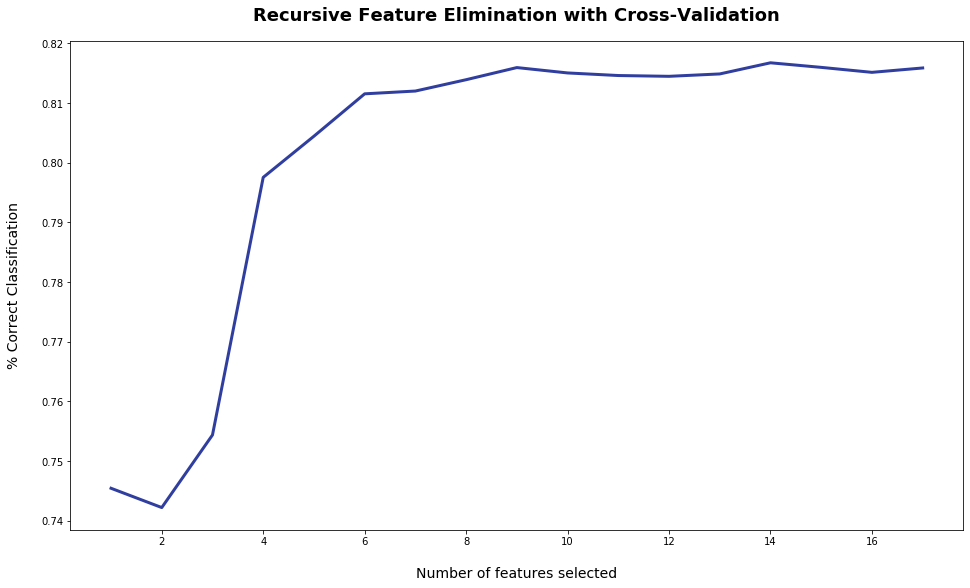

In [23]:
# Grafico la cantiadad necesaria de features
plt.figure(figsize=(16, 9))

plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)

plt.xlabel('Number of features selected', fontsize=14, labelpad=20)

plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [35]:
# Elimino las variables que tienen poco aporte con el siguiente script:

print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

#Se elimina o sacan las variables SEX, MARRIAGE y PAY_6




[ 1  3 10]


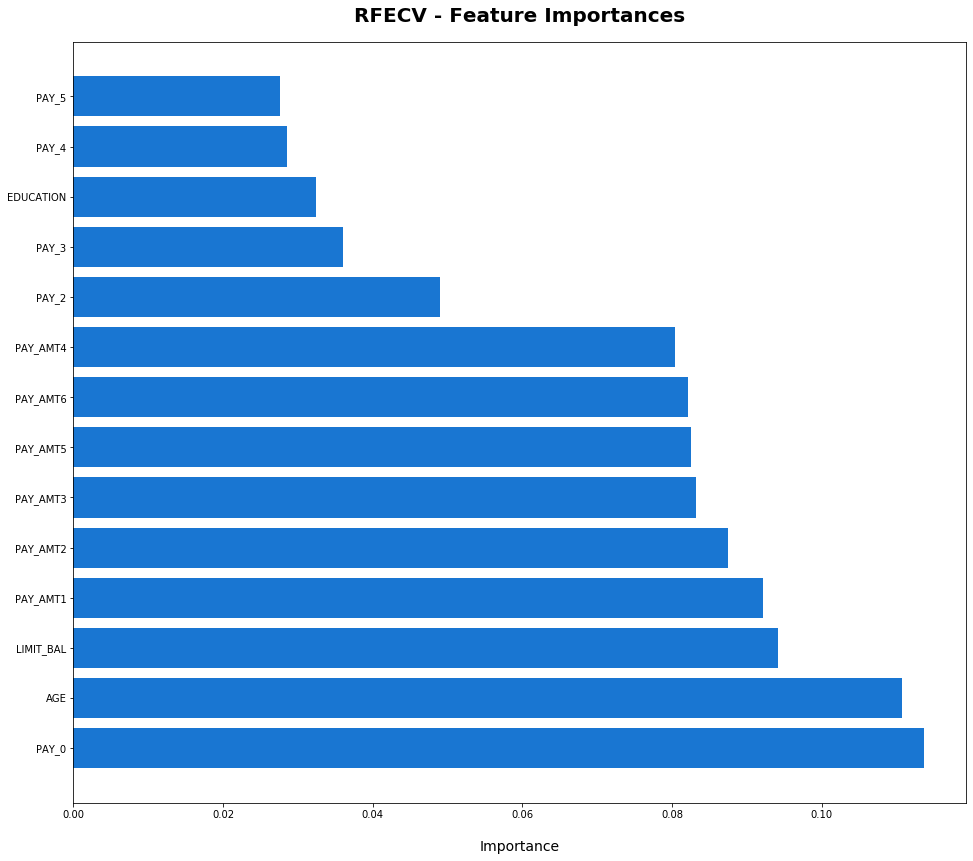

In [36]:
#Procedo a generar un grafico de las variables mas importantes>

dset = pd.DataFrame()

dset['attr'] = X.columns

dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))

plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')

plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)

plt.xlabel('Importance', fontsize=14, labelpad=20)

plt.show()

In [15]:
#Procedo a eliminar todas las variables que no aportan y las que tenian una importancia menor a 0.06
# Al hacer esto nos quedamos con nueve variables obteniendo un resultado practicamente igual que con 14 variables,
# de acuerdo al grafico de cantidad de variables recomendadas
rawData1.drop(['SEX', 'MARRIAGE', 'PAY_6', 'PAY_3', 'PAY_2', 'PAY_4', 'PAY_5', 'EDUCATION'], axis = 1, inplace = True)

In [16]:
rawData1.head()

,LIMIT_BAL,AGE,PAY_0,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,24,2,0,689,0,0,0,0,True
1,120000,26,-1,0,1000,1000,1000,0,2000,True
2,90000,34,0,1518,1500,1000,1000,1000,5000,False
3,50000,37,0,2000,2019,1200,1100,1069,1000,False
4,50000,57,-1,2000,36681,10000,9000,689,679,False


In [17]:
#Selecting Data- Select the features

features1 = rawData1.iloc[:, 0:8]

In [18]:
features1.head()

,LIMIT_BAL,AGE,PAY_0,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,24,2,0,689,0,0,0
1,120000,26,-1,0,1000,1000,1000,0
2,90000,34,0,1518,1500,1000,1000,1000
3,50000,37,0,2000,2019,1200,1100,1069
4,50000,57,-1,2000,36681,10000,9000,689


In [19]:
#Defino la variable dependiente

depVar1 = rawData1['DEFAULT']


In [22]:
depVar1.head()

0     True
1     True
2    False
3    False
4    False
Name: DEFAULT, dtype: bool

In [20]:
# Defino el training set
# Training Set (Feature Space: X Training)

X_train1 = (features1[: 5000])
X_train1.head()

,LIMIT_BAL,AGE,PAY_0,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,24,2,0,689,0,0,0
1,120000,26,-1,0,1000,1000,1000,0
2,90000,34,0,1518,1500,1000,1000,1000
3,50000,37,0,2000,2019,1200,1100,1069
4,50000,57,-1,2000,36681,10000,9000,689


In [21]:
# Training set para la variable dependiente
# The number of rows much match the X-training set

Y_train1 = depVar1[:5000]
Y_train1_count = len(Y_train1.index)
print('The number of observations in the Y training set are:',str(Y_train1_count))
Y_train1.head()

The number of observations in the Y training set are: 5000


0     True
1     True
2    False
3    False
4    False
Name: DEFAULT, dtype: bool

In [22]:
# Genero el testing set para las variables independientes (X-Variables or Feature space)
X_test1 = features1[-500:]
X_test1_count = len(X_test1.index)
print('The number of observations in the feature testing set is:', str(X_test1_count))
print(X_test1.head())

The number of observations in the feature testing set is: 500
       LIMIT_BAL  AGE  PAY_0  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5
29500      10000   42      2      4505         0       334       801         0
29501     300000   43     -1       412      5459         0      1000        16
29502     210000   39     -2       726       632         0         0         0
29503      60000   36      1         0      5300         0      3000      1600
29504      20000   40      1      3000         0      2560       955         0


In [23]:
# Genero el testing para la variable dependiente, Ground Truth (y_test)
Y_test1 = depVar1[-500:]
Y_test1_count = len(Y_test1.index)
print('The number of observations in the Y training set are:', str(Y_test1_count))
Y_test1.head()

The number of observations in the Y training set are: 500


29500     True
29501    False
29502    False
29503     True
29504    False
Name: DEFAULT, dtype: bool

In [24]:
#Cross Validation

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train1, Y_train1)
X_train1.shape, X_test1.shape

((3750, 8), (1250, 8))

In [25]:
#Nombro los modelos
# SVM
C = 1.0  # SVM regularization parameter
modelSVM1 = svm.SVC(kernel='linear', C=C)
modelSVM2 = svm.SVC(kernel='rbf', gamma=0.7, C=C)


In [26]:
# RF
modelRF1 = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
modelRF2 = RandomForestClassifier(n_estimators=500, bootstrap = True, max_features = 'sqrt')


In [27]:
#Desicion Tree
modelDT1 = DecisionTreeClassifier()
modelDT2 = DecisionTreeClassifier(max_depth=50)

In [73]:
#Inicio entrenamiento
#SVM1
modelSVM1.fit(X_train1, Y_train1)
print(cross_val_score(modelSVM1, X_train1, Y_train1)) # Ejecucion del resultado de crossvalidation
modelSVM1.score(X_train1, Y_train1) # Ejecto un Rsquared para obtener un indicador

[0.75333333 0.77466667 0.76266667 0.76533333 0.75733333]


0.7589333333333333

In [74]:
#SVM2
modelSVM2.fit(X_train1, Y_train1)
print(cross_val_score(modelSVM2, X_train1, Y_train1)) # Ejecucion del resultado de crossvalidation
modelSVM2.score(X_train1, Y_train1) # Ejecto un Rsquared para obtener un indicador

[0.776      0.77466667 0.77466667 0.77333333 0.772     ]


0.9970666666666667

In [75]:
#RF1
modelRF1.fit(X_train1, Y_train1)
print(cross_val_score(modelRF1, X_train1, Y_train1)) 
modelRF1.score(X_train1, Y_train1) 

[0.78666667 0.79333333 0.808      0.792      0.808     ]


0.9978666666666667

In [76]:
#RF2
modelRF2.fit(X_train1, Y_train1)
print(cross_val_score(modelRF2, X_train1, Y_train1)) 
modelRF2.score(X_train1, Y_train1)

[0.78133333 0.8        0.81066667 0.79066667 0.80666667]


0.9981333333333333

In [77]:
#DT1
modelDT1.fit(X_train1, Y_train1)
print(cross_val_score(modelDT1, X_train1, Y_train1)) 
modelDT1.score(X_train1, Y_train1)

[0.70666667 0.684      0.704      0.69333333 0.72933333]


0.9981333333333333

In [78]:
#DT2
modelDT2.fit(X_train1, Y_train1)
print(cross_val_score(modelDT2, X_train1, Y_train1)) 
modelDT2.score(X_train1, Y_train1)

[0.69733333 0.68933333 0.70266667 0.696      0.71733333]


0.9981333333333333

In [58]:
#Inicio el testing
#Genero las predicciones


In [81]:
#SVM1
predictSVM1 = modelSVM1.predict(X_test1)
print(classification_report(Y_test1, predictSVM1))
print('Accuracy:', accuracy_score(Y_test1, predictSVM1))
pd.DataFrame(confusion_matrix(Y_test1, predictSVM1),
             columns=['Predicted Not Default', 'Predicted Default'],
             index=['True Not Default', 'True Default'])

              precision    recall  f1-score   support

       False       0.79      0.94      0.86       989
        True       0.25      0.07      0.11       261

    accuracy                           0.76      1250
   macro avg       0.52      0.51      0.49      1250
weighted avg       0.68      0.76      0.71      1250

Accuracy: 0.7616


,Predicted Not Default,Predicted Default
True Not Default,933,56
True Default,242,19


In [82]:
#SVM2
predictSVM2 = modelSVM2.predict(X_test1)
print(classification_report(Y_test1, predictSVM2))
print('Accuracy:', accuracy_score(Y_test1, predictSVM2))
pd.DataFrame(confusion_matrix(Y_test1, predictSVM2),
             columns=['Predicted Not Default', 'Predicted Default'],
             index=['True Not Default', 'True Default'])

              precision    recall  f1-score   support

       False       0.79      1.00      0.88       989
        True       0.00      0.00      0.00       261

    accuracy                           0.79      1250
   macro avg       0.40      0.50      0.44      1250
weighted avg       0.63      0.79      0.70      1250

Accuracy: 0.7912


C:\Users\Frass\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Predicted Not Default,Predicted Default
True Not Default,989,0
True Default,261,0


In [83]:
#RF1
predictRF1 = modelRF1.predict(X_test1)
print(classification_report(Y_test1, predictRF1))
print('Accuracy:', accuracy_score(Y_test1, predictRF1))
pd.DataFrame(confusion_matrix(Y_test1, predictRF1),
             columns=['Predicted Not Default', 'Predicted Default'],
             index=['True Not Default', 'True Default'])

              precision    recall  f1-score   support

       False       0.83      0.94      0.88       989
        True       0.55      0.28      0.37       261

    accuracy                           0.80      1250
   macro avg       0.69      0.61      0.63      1250
weighted avg       0.77      0.80      0.78      1250

Accuracy: 0.8024


,Predicted Not Default,Predicted Default
True Not Default,931,58
True Default,189,72


In [84]:
#RF2
predictRF2 = modelRF2.predict(X_test1)
print(classification_report(Y_test1, predictRF2))
print('Accuracy:', accuracy_score(Y_test1, predictRF2))
pd.DataFrame(confusion_matrix(Y_test1, predictRF2),
             columns=['Predicted Not Default', 'Predicted Default'],
             index=['True Not Default', 'True Default'])

              precision    recall  f1-score   support

       False       0.83      0.94      0.88       989
        True       0.55      0.27      0.36       261

    accuracy                           0.80      1250
   macro avg       0.69      0.61      0.62      1250
weighted avg       0.77      0.80      0.77      1250

Accuracy: 0.8016


,Predicted Not Default,Predicted Default
True Not Default,931,58
True Default,190,71


In [85]:
#DT1
predictDT1 = modelDT1.predict(X_test1)
print(classification_report(Y_test1, predictDT1))
print('Accuracy:', accuracy_score(Y_test1, predictDT1))
pd.DataFrame(confusion_matrix(Y_test1, predictDT1),
             columns=['Predicted Not Default', 'Predicted Default'],
             index=['True Not Default', 'True Default'])

              precision    recall  f1-score   support

       False       0.82      0.81      0.82       989
        True       0.33      0.34      0.34       261

    accuracy                           0.72      1250
   macro avg       0.58      0.58      0.58      1250
weighted avg       0.72      0.72      0.72      1250

Accuracy: 0.7168


,Predicted Not Default,Predicted Default
True Not Default,806,183
True Default,171,90


In [86]:
#DT2
predictDT2 = modelDT2.predict(X_test1)
print(classification_report(Y_test1, predictDT2))
print('Accuracy:', accuracy_score(Y_test1, predictDT2))
pd.DataFrame(confusion_matrix(Y_test1, predictDT2),
             columns=['Predicted Not Default', 'Predicted Default'],
             index=['True Not Default', 'True Default'])

              precision    recall  f1-score   support

       False       0.82      0.82      0.82       989
        True       0.33      0.34      0.34       261

    accuracy                           0.72      1250
   macro avg       0.58      0.58      0.58      1250
weighted avg       0.72      0.72      0.72      1250

Accuracy: 0.7184


,Predicted Not Default,Predicted Default
True Not Default,809,180
True Default,172,89


In [31]:
#Debido a que RF entrega los mejores indicadores, especialmente en Recall y Accuracy,
# se decide mejorar el tuning de este algoritmo.

forest = RandomForestClassifier(random_state = 1, n_estimators = [20,100, 300, 500, 800, 1200],
                                max_depth = [5, 8, 15,16, 25, 30,32], 
                                min_samples_split = [2, 5, 10, 15, 100], 
                                min_samples_leaf = [1, 2, 5, 10])

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

In [32]:
gridF = gridF.fit(X_train1, Y_train1)
print(gridF.best_params_)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed: 15.0min finished


{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}


In [36]:
#Modelo tuneado final RF
rfready = RandomForestClassifier(max_depth = 5, min_samples_leaf = 5, min_samples_split = 15, n_estimators = 100)

In [37]:
#Corro el modelo tuneado
#rfready
rfready.fit(X_train1, Y_train1)
print(cross_val_score(rfready, X_train1, Y_train1)) 
rfready.score(X_train1, Y_train1)

[0.80266667 0.8        0.804      0.79866667 0.79733333]


0.8170666666666667

In [38]:
#Prediccion rfReady (Random Forest)
predictrfready = rfready.predict(X_test1)
print(classification_report(Y_test1, predictrfready))
print('Accuracy:', accuracy_score(Y_test1, predictrfready))
pd.DataFrame(confusion_matrix(Y_test1, predictrfready),
             columns=['Predicted Not Default', 'Predicted Default'],
             index=['True Not Default', 'True Default'])

              precision    recall  f1-score   support

       False       0.81      0.97      0.88       976
        True       0.61      0.19      0.28       274

    accuracy                           0.80      1250
   macro avg       0.71      0.58      0.58      1250
weighted avg       0.76      0.80      0.75      1250

Accuracy: 0.7952


,Predicted Not Default,Predicted Default
True Not Default,943,33
True Default,223,51


In [45]:
#Contrario a lo que se esperaba, pese a cambiar los parametros de acuerdo a lo esperado no se obtuvo un mejor resultado.
# Al revisar en detalle se observa como el decision tree ofrece mejores resultados, se procede a tunear el DT.

#DTready = DecisionTreeClassifier()
#modelDT2 = DecisionTreeClassifier(max_depth=50)

desiciontree = DecisionTreeClassifier(max_depth = [10, 15,20, 25, 60, 100, 200])

hyperdt = dict(max_depth = max_depth)

griddt = GridSearchCV(desiciontree, hyperdt, cv = 10, verbose = 1, 
                      n_jobs = -1)

In [46]:
griddt = griddt.fit(X_train1, Y_train1)
print(griddt.best_params_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_depth': 5}


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished


In [93]:
#Pese a que me indica que lo corra con 5 el resultado no fue mejor, lo corri con 200 en max_depth y obtuve un mejor resultado.
# El modelo seleccionado corresponde a un Desicion Tree con criterion = 'gini', max_depth = 200.
DTready = DecisionTreeClassifier(criterion = 'gini', max_depth = 200)

In [94]:
#DTReady
DTready.fit(X_train1, Y_train1)
print(cross_val_score(DTready, X_train1, Y_train1)) 
DTready.score(X_train1, Y_train1)

[0.70933333 0.72       0.692      0.71066667 0.70533333]


0.9981333333333333

In [95]:
#Prediccion DTReady (Desicion Tree)
predictDTready = DTready.predict(X_test1)
print(classification_report(Y_test1, predictDTready))
print('Accuracy:', accuracy_score(Y_test1, predictDTready))
pd.DataFrame(confusion_matrix(Y_test1, predictDTready),
             columns=['Predicted Not Default', 'Predicted Default'],
             index=['True Not Default', 'True Default'])

              precision    recall  f1-score   support

       False       0.83      0.79      0.81       976
        True       0.36      0.42      0.39       274

    accuracy                           0.71      1250
   macro avg       0.60      0.61      0.60      1250
weighted avg       0.73      0.71      0.72      1250

Accuracy: 0.7112


,Predicted Not Default,Predicted Default
True Not Default,775,201
True Default,160,114
